In [13]:
import pandas as pd
import numpy as np
from datetime import datetime

In [14]:
offline = pd.read_csv("../data/test_csv/오프라인.csv", encoding = 'cp949')
online = pd.read_csv("../data/test_csv/온라인.csv", encoding = 'cp949')

offline.info() , online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   crym          2648 non-null   int64  
 1   tco_btc_nm    2648 non-null   object 
 2   ma_fem_dc     2648 non-null   int64  
 3   agegrp_dc     2648 non-null   int64  
 4   tco_btc_u_ct  2648 non-null   int64  
 5   tco_btc_u_am  2648 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 124.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   crym          651 non-null    int64
 1   ma_fem_dc     651 non-null    int64
 2   agegrp_dc     651 non-null    int64
 3   tco_btc_u_ct  651 non-null    int64
 4   tco_btc_u_am  651 non-null    int64
dtypes: int64(5)
memory usage: 25.6 KB


(None, None)

In [15]:
offline = offline.rename(columns={
    'crym': '기준년월',
    'tco_btc_nm': '업종',
    'ma_fem_dc': '성별',
    'agegrp_dc': '연령대',
    'tco_btc_u_ct': '총이용건수',
    'tco_btc_u_am': '총이용금액'
})

online = online.rename(columns={
    'crym': '기준년월',
    'ma_fem_dc': '성별',
    'agegrp_dc': '연령대',
    'tco_btc_u_ct': '총이용건수',
    'tco_btc_u_am': '총이용금액'
})

offline.head(1), online.head(1)

(     기준년월   업종  성별  연령대  총이용건수   총이용금액
 0  201901  백화점   1    1      1  7600.0,
      기준년월  성별  연령대  총이용건수   총이용금액
 0  201901   1    1      1  110685)

In [16]:
offline['기준년월'] = pd.to_datetime(offline['기준년월'], format="%Y%m")
online['기준년월'] = pd.to_datetime(online['기준년월'], format="%Y%m")

offline['기준년'] = offline['기준년월'].dt.strftime("%Y")
online['기준년'] = online['기준년월'].dt.strftime("%Y")

In [17]:
offline.head(1), online.head(1)


(        기준년월   업종  성별  연령대  총이용건수   총이용금액   기준년
 0 2019-01-01  백화점   1    1      1  7600.0  2019,
         기준년월  성별  연령대  총이용건수   총이용금액   기준년
 0 2019-01-01   1    1      1  110685  2019)

In [18]:
offon = pd.concat([offline, online], axis=0)
offon

,기준년월,업종,성별,연령대,총이용건수,총이용금액,기준년
0,2019-01-01,백화점,1,1,1,7.600000e+03,2019
1,2019-01-01,백화점,1,10,379,1.945872e+07,2019
2,2019-01-01,백화점,1,20,45173,4.747711e+09,2019
3,2019-01-01,백화점,1,30,271858,2.791826e+10,2019
4,2019-01-01,백화점,1,40,391109,3.791149e+10,2019
...,...,...,...,...,...,...,...
646,2021-09-01,NaN,2,50,3237324,1.813605e+11,2021
647,2021-09-01,NaN,2,60,1019719,7.002663e+10,2021
648,2021-09-01,NaN,2,70,159261,1.309103e+10,2021
649,2021-09-01,NaN,2,80,20094,1.935122e+09,2021


In [21]:
offon['업종'].fillna('온라인')

0      백화점
1      백화점
2      백화점
3      백화점
4      백화점
      ... 
646    온라인
647    온라인
648    온라인
649    온라인
650    온라인
Name: 업종, Length: 3299, dtype: object

In [34]:
list(map(lambda x : '온라인' if pd.isna(x) else x, offon['업종']))

['백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '슈퍼마켓',
 '슈퍼마켓',
 '슈퍼마켓',
 '슈퍼마켓',
 '슈퍼마켓',
 '슈퍼마켓',
 '슈퍼마켓',
 '슈퍼마켓',
 '슈퍼마켓',
 '슈퍼마켓',
 '슈퍼마켓',
 '슈퍼마켓',
 '슈퍼마켓',
 '슈퍼마켓',
 '슈퍼마켓',
 '슈퍼마켓',
 '슈퍼마켓',
 '슈퍼마켓',
 '슈퍼마켓',
 '슈퍼마켓',
 '슈퍼마켓',
 '편의점',
 '편의점',
 '편의점',
 '편의점',
 '편의점',
 '편의점',
 '편의점',
 '편의점',
 '편의점',
 '편의점',
 '편의점',
 '편의점',
 '편의점',
 '편의점',
 '편의점',
 '편의점',
 '편의점',
 '편의점',
 '편의점',
 '편의점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '백화점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '할인점',
 '슈퍼마켓',
 '슈퍼마켓',
 '슈퍼마켓',


In [35]:
offon['업종'].fillna('온라인', inplace=True)

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_10628\1963776869.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  offon['업종'].fillna('온라인', inplace=True)


In [39]:
df2 = offon.loc[offon['연령대'] != 0]

In [45]:
group_data1 = df2.groupby(['기준년월','업종'])[['총이용금액']].sum()
group_data1

총이용금액
기준년월       업종                
2019-01-01 백화점   4.558954e+11
           슈퍼마켓  1.736124e+11
           온라인   7.782817e+11
           편의점   4.408355e+10
           할인점   1.981718e+11
...                       ...
2021-09-01 백화점   4.220791e+11
           슈퍼마켓  1.818071e+11
           온라인   1.195268e+12
           편의점   6.136224e+10
           할인점   1.510787e+11

[165 rows x 1 columns]

In [43]:
import matplotlib.pyplot as plt
import platform

if platform.system() == "Darwin":
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = "Malgun Gothic")

<Axes: xlabel='기준년월'>

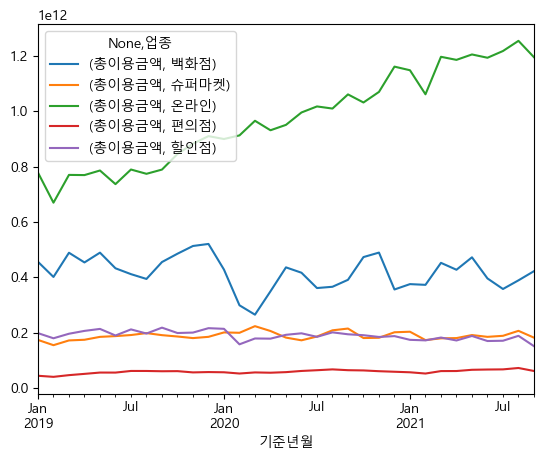

In [48]:
group_data1.unstack().plot()

In [69]:
group_data1.reset_index(inplace=True)
group_data1['onoff'] = list(map(lambda x : 0 if x == "온라인" else 1, group_data1['업종']))
group_data1 

,기준년월,업종,총이용금액,onoff
0,2019-01-01,백화점,4.558954e+11,1
1,2019-01-01,슈퍼마켓,1.736124e+11,1
2,2019-01-01,온라인,7.782817e+11,0
3,2019-01-01,편의점,4.408355e+10,1
4,2019-01-01,할인점,1.981718e+11,1
...,...,...,...,...
160,2021-09-01,백화점,4.220791e+11,1
161,2021-09-01,슈퍼마켓,1.818071e+11,1
162,2021-09-01,온라인,1.195268e+12,0
163,2021-09-01,편의점,6.136224e+10,1


In [71]:
# df2.groupby(['기준년월','업종'])[['총이용금액']].sum()
group_data2 = group_data1.groupby(['기준년월','onoff'])[['총이용금액']].sum()

<Axes: xlabel='기준년월'>

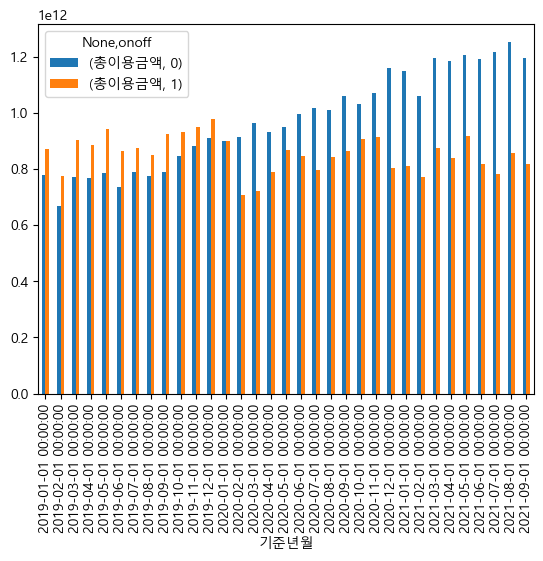

In [73]:
group_data2.unstack().plot(kind="bar")